
# Face completion with a multi-output estimators

This example shows the use of multi-output estimator to complete images.
The goal is to predict the lower half of a face given its upper half.

The first column of images shows true faces. The next columns illustrate
how extremely randomized trees, k nearest neighbors, linear
regression and ridge regression complete the lower half of those faces.


Modelo Extra trees guardado como Extra_trees_model.pkl
Modelo K-nn guardado como K-nn_model.pkl
Modelo Linear regression guardado como Linear_regression_model.pkl
Modelo Ridge guardado como Ridge_model.pkl


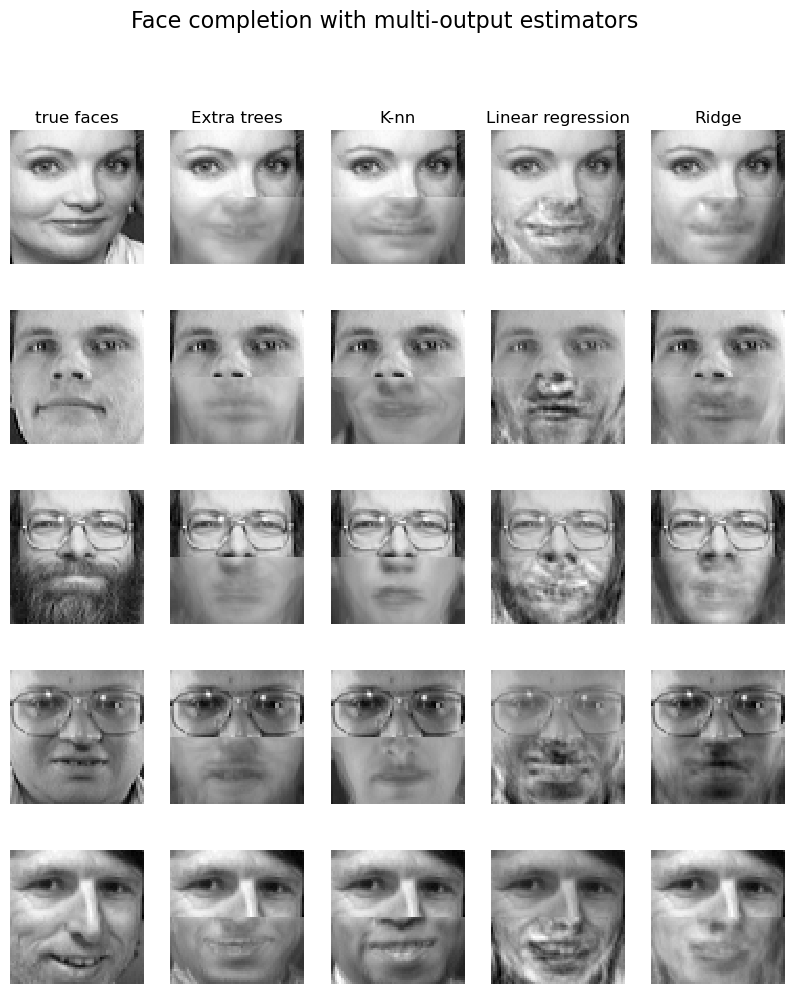

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_random_state
import pickle


# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, : (n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2 :]
X_test = test[:, : (n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2 :]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(
        n_estimators=10, max_features=32, random_state=0
    ),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

# Fit estimators and save each model
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    # Entrena el modelo
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

    # Guarda el modelo con pickle
    with open(f"{name.replace(' ', '_')}_model.pkl", "wb") as model_file:
        pickle.dump(estimator, model_file)
        print(f"Modelo {name} guardado como {name.replace(' ', '_')}_model.pkl")

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2.0 * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j, title=est)

        sub.axis("off")
        sub.imshow(
            completed_face.reshape(image_shape),
            cmap=plt.cm.gray,
            interpolation="nearest",
        )

plt.show()

In [2]:
y_test_predict

{'Extra trees': array([[0.58099174, 0.61652891, 0.65165289, ..., 0.22933884, 0.24214876,
         0.24958677],
        [0.49049587, 0.45702479, 0.53264463, ..., 0.43471074, 0.36033058,
         0.33801653],
        [0.47272728, 0.45082644, 0.41611571, ..., 0.2946281 , 0.29421487,
         0.28801653],
        [0.64297521, 0.61363637, 0.62561983, ..., 0.2516529 , 0.27561984,
         0.27107438],
        [0.43347107, 0.47933884, 0.46528925, ..., 0.31818182, 0.35413224,
         0.36735536]]),
 'K-nn': array([[0.6603306 , 0.6743802 , 0.69008267, ..., 0.3305785 , 0.3371901 ,
         0.3305785 ],
        [0.3694215 , 0.37438014, 0.42066115, ..., 0.30495867, 0.30826446,
         0.29421487],
        [0.42148763, 0.43884295, 0.3702479 , ..., 0.24710746, 0.25454545,
         0.25950414],
        [0.585124  , 0.58842975, 0.6041322 , ..., 0.43223143, 0.43471074,
         0.39173552],
        [0.4338843 , 0.46115702, 0.4892562 , ..., 0.37107438, 0.36280993,
         0.33305785]], dtype=float32)